In [1]:
import pandas as pd
import numpy as np
import shutil
import subprocess
import time
import pandas as pd
import sqlite3
import numpy as np
calibration_start_time = time.time()

def assignNewTurn(TurnDf,InflowDf,initial_solution):
    # Between Amin Dr. and  I-75 SB Off Ramp 
    TurnDf.loc[(TurnDf['entrance'] == 680) & (TurnDf['exit'] == 697), 'turn'] = initial_solution[0]*100
    TurnDf.loc[(TurnDf['entrance'] == 680) & (TurnDf['exit'] == 674), 'turn'] = (1-initial_solution[0])*100
    TurnDf.loc[(TurnDf['entrance'] == 680) & (TurnDf['exit'] == 669), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 701) & (TurnDf['exit'] == 669), 'turn'] = initial_solution[1]*100
    TurnDf.loc[(TurnDf['entrance'] == 701) & (TurnDf['exit'] == 697), 'turn'] = (1-initial_solution[1])*100
    TurnDf.loc[(TurnDf['entrance'] == 701) & (TurnDf['exit'] == 674), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 693) & (TurnDf['exit'] == 674), 'turn'] = initial_solution[2]*100
    TurnDf.loc[(TurnDf['entrance'] == 693) & (TurnDf['exit'] == 669), 'turn'] = (1-initial_solution[2])*100
    TurnDf.loc[(TurnDf['entrance'] == 693) & (TurnDf['exit'] == 697), 'turn'] = 0
    # Between Napier Rd. and Lifestyle Way1
    TurnDf.loc[(TurnDf['entrance'] == 668) & (TurnDf['exit'] == 687), 'turn'] = initial_solution[3]*100
    TurnDf.loc[(TurnDf['entrance'] == 668) & (TurnDf['exit'] == 675), 'turn'] = (1-initial_solution[3])*100
    TurnDf.loc[(TurnDf['entrance'] == 668) & (TurnDf['exit'] == 684), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 664) & (TurnDf['exit'] == 684), 'turn'] = initial_solution[4]*100
    TurnDf.loc[(TurnDf['entrance'] == 664) & (TurnDf['exit'] == 687), 'turn'] = (1-initial_solution[4])*100
    TurnDf.loc[(TurnDf['entrance'] == 664) & (TurnDf['exit'] == 675), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 704) & (TurnDf['exit'] == 675), 'turn'] = initial_solution[5]*100
    TurnDf.loc[(TurnDf['entrance'] == 704) & (TurnDf['exit'] == 684), 'turn'] = (1-initial_solution[5])*100
    TurnDf.loc[(TurnDf['entrance'] == 704) & (TurnDf['exit'] == 687), 'turn'] = 0
    # Between Napier Rd. and Lifestyle Way2
    TurnDf.loc[(TurnDf['entrance'] == 657) & (TurnDf['exit'] == 668), 'turn'] = initial_solution[6]*100
    TurnDf.loc[(TurnDf['entrance'] == 657) & (TurnDf['exit'] == 666), 'turn'] = (1-initial_solution[6])*100
    TurnDf.loc[(TurnDf['entrance'] == 657) & (TurnDf['exit'] == 703), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 656) & (TurnDf['exit'] == 703), 'turn'] = initial_solution[7]*100
    TurnDf.loc[(TurnDf['entrance'] == 656) & (TurnDf['exit'] == 668), 'turn'] = (1-initial_solution[7])*100
    TurnDf.loc[(TurnDf['entrance'] == 656) & (TurnDf['exit'] == 666), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 684) & (TurnDf['exit'] == 666), 'turn'] = initial_solution[8]*100
    TurnDf.loc[(TurnDf['entrance'] == 684) & (TurnDf['exit'] == 703), 'turn'] = (1-initial_solution[8])*100
    TurnDf.loc[(TurnDf['entrance'] == 684) & (TurnDf['exit'] == 668), 'turn'] = 0
    # Between  Lifestyle Way and Gunbarrel Road
    TurnDf.loc[(TurnDf['entrance'] == 681) & (TurnDf['exit'] == 686), 'turn'] = initial_solution[9]*100
    TurnDf.loc[(TurnDf['entrance'] == 681) & (TurnDf['exit'] == 682), 'turn'] = (1-initial_solution[9])*100
    TurnDf.loc[(TurnDf['entrance'] == 681) & (TurnDf['exit'] == 676), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 660) & (TurnDf['exit'] == 676), 'turn'] = initial_solution[10]*100
    TurnDf.loc[(TurnDf['entrance'] == 660) & (TurnDf['exit'] == 686), 'turn'] = (1-initial_solution[10])*100
    TurnDf.loc[(TurnDf['entrance'] == 660) & (TurnDf['exit'] == 682), 'turn'] = 0
    TurnDf.loc[(TurnDf['entrance'] == 696) & (TurnDf['exit'] == 682), 'turn'] = initial_solution[11]*100
    TurnDf.loc[(TurnDf['entrance'] == 696) & (TurnDf['exit'] == 676), 'turn'] = (1-initial_solution[11])*100
    TurnDf.loc[(TurnDf['entrance'] == 696) & (TurnDf['exit'] == 686), 'turn'] = 0

    # Between Amin Dr. and  I-75 SB Off Ramp
    InflowDf.loc[(InflowDf['entrance'] == 701), 'flow'] = int(initial_solution[12])
    # Between Napier Rd. and Lifestyle Way1
    InflowDf.loc[(InflowDf['entrance'] == 664), 'flow'] = int(initial_solution[13])   
    # Between Napier Rd. and Lifestyle Way2
    InflowDf.loc[(InflowDf['entrance'] == 656), 'flow'] = int(initial_solution[14])
    # Between  Lifestyle Way and Gunbarrel Road
    InflowDf.loc[(InflowDf['entrance'] == 681), 'flow'] = int(initial_solution[15])
    return TurnDf,InflowDf


initial_solution = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,100,100,100,100])

def genDemand(initial_solution):
    TurnDf = pd.read_csv('turn800_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow800_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn800.csv', index=False, header=False)
    InflowDf.to_csv('inflow800.csv', index=False, header=False)

    TurnDf = pd.read_csv('turn815_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow815_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn815.csv', index=False, header=False)
    InflowDf.to_csv('inflow815.csv', index=False, header=False)

    TurnDf = pd.read_csv('turn830_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow830_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn830.csv', index=False, header=False)
    InflowDf.to_csv('inflow830.csv', index=False, header=False)

    TurnDf = pd.read_csv('turn845_org.csv', header=None, names=['entrance', 'exit', 'turn'])
    InflowDf = pd.read_csv('inflow845_org.csv', header=None, names=['entrance', 'flow'])
    TurnDf,InflowDf = assignNewTurn(TurnDf,InflowDf,initial_solution)
    TurnDf.to_csv('turn845.csv', index=False, header=False)
    InflowDf.to_csv('inflow845.csv', index=False, header=False)
    
    # cmd1 = '"C:\\Program Files\\Aimsun\\Aimsun Next 23\\Aimsun Next.exe" --project "D:\\RealTwin\\Real-Twin Workflow Paper\\aimsun simulation_0506actuatedsignal\\chatt.ang" --command execute --target 1269'
    cmd1 = '"C:\\Program Files\\Aimsun\\Aimsun Next 23\\aconsole.exe" -script "C:\\Users\\xugua\\Downloads\\RealTwin Calibration\\aimsun simulation_0506actuatedsignal\\importdemand.py" "C:\\Users\\xugua\\Downloads\\RealTwin Calibration\\aimsun simulation_0506actuatedsignal\\chatt.ang"'
    process = subprocess.Popen(cmd1, shell=True)
    # process = subprocess.Popen(cmd1, shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    process.wait()

def runAimsun():
    cmd2 = '"C:\\Program Files\\Aimsun\\Aimsun Next 23\\aconsole.exe" --project "C:\\Users\\xugua\\Downloads\\RealTwin Calibration\\aimsun simulation_0506actuatedsignal\\chatt.ang" --command execute --target 955'
    process = subprocess.Popen(cmd2, shell=True)
    process.wait()


def resultAnalysis():
    dataname = "Resources\Outputs\chatt.sqlite"
    con = sqlite3.connect(dataname)
    section0 = pd.read_sql_query("SELECT * from MISECT", con)
    section = section0[(section0['sid'] == 1) & (section0['ent'] == 1)]
    con.close()
    # section.to_excel('section.xlsx', index=False)
    compare = pd.read_excel('compare.xlsx')
    compare = compare.merge(section[['oid', 'count']], left_on='entrance', right_on='oid', how='left')
    compare.drop(columns='oid', inplace=True)
    compare['GEH'] = np.sqrt(2 * ((compare['count'] - compare['realcount']) ** 2) / (compare['count'] + compare['realcount']))
    meanGEH = compare['GEH'].mean()
    GEHPercent = (compare['GEH'] < 5).mean()
    return meanGEH,GEHPercent

In [ ]:
# GA Parameters
num_variables = 16
Np =12  # number of turning ratio variables, remainings should be inflow
ubc = 200
population_size = 50  # must be even
num_generations = 30
crossover_rate = 0.75
mutation_rate = 0.1
elitism_size = 1  # Number of elite individuals to carry over
best_fitness_value = float('inf')
max_no_improvement = 5  # Stop if no improvement in 5 iterations

# Other parameter
lower_bound = 0
upper_bound = 1
CalibrationTarget = {'GEH':5,'GEHPercent':0.85}
minGEHset = []


def objective_function(x,Np,ubc):
    y=x.copy()
    y[Np:] = y[Np:]*ubc
    genDemand(y)
    runAimsun()
    value,neighborhood_percent = resultAnalysis()
    return value

# Initialize population
population = np.random.rand(population_size, num_variables)
iterations_without_improvement = 0
# Evolution loop
calibration_start_time = time.time()
for generation in range(num_generations):
    print('Calibration iteration {}:'.format(generation))
    # Evaluate fitness
    fitness = np.zeros(population_size)
    for i in range(population_size):
        fitness[i] = objective_function(population[i],Np,ubc)
    # print(population)
    # print(fitness)

    # Check for improvement
    current_best_fitness = np.min(fitness)
    minGEHset.append(current_best_fitness)
    print('    minimum mean GEH in this iteration is {}.'.format(current_best_fitness))

    # if current_best_fitness < best_fitness_value:
    #     best_fitness_value = current_best_fitness
    #     iterations_without_improvement = 0
    # else:
    #     iterations_without_improvement += 1
    # # Check if stopping criteria met
    # if iterations_without_improvement >= max_no_improvement:
    #     print("No improvement in the last {} iterations. Stopping early.".format(max_no_improvement))
    #     break

    # Elitism
    elite_indices = np.argsort(fitness)[:elitism_size]
    elite_individuals = population[elite_indices]
    
    # Selection (tournament)
    max_fitness = np.max(fitness)
    inverted_fitness = max_fitness + 1 - fitness
    selected_indices = np.random.choice(range(population_size), size=population_size - elitism_size, replace=True, p=inverted_fitness / np.sum(inverted_fitness))
    selected_population = population[selected_indices]
    
    # Crossover
    offspring = []
    num_offspring = population_size - elitism_size
    for i in range(0, num_offspring, 2):
        if np.random.rand() < crossover_rate and i + 1 < num_offspring:
            crossover_point = np.random.randint(1, num_variables)
            offspring1 = np.concatenate((selected_population[i][:crossover_point], selected_population[i + 1][crossover_point:]))
            offspring2 = np.concatenate((selected_population[i + 1][:crossover_point], selected_population[i][crossover_point:]))
            offspring.append(offspring1)
            offspring.append(offspring2)
        else:
            offspring.append(selected_population[i])
            if i + 1 < num_offspring:
                offspring.append(selected_population[i + 1])
    offspring = np.array(offspring)

    
    # Mutation
    mutation_indices = np.random.rand(population_size - elitism_size, num_variables) < mutation_rate
    offspring[mutation_indices] = np.random.rand(np.sum(mutation_indices))
    
    # Update population
    if generation < num_generations-1:  # avoid change population after final iteration
        population = np.vstack((elite_individuals, offspring))
    print("Current calibration time is {} sec.".format(time.time() - calibration_start_time))
    # print(population)

# Find the best solution
best_fitness_index = np.argmin(fitness)
best_solution = population[best_fitness_index].copy()
ical = 'final'
print("Best solution:", best_solution)
print("Mean GEH:", objective_function(best_solution,Np,ubc))


genDemand(best_solution)
runAimsun()
meanGEH,GEHpercent = resultAnalysis()

print("In final results, {} percent GEH is lower than 5.".format(int(GEHpercent*10000)/100))
# if flag:
#     print("All traffic volume requirements are met.")
# else:
#     print("Not all traffic volume requirements are met.")
best_solution_final = best_solution
best_solution_final[Np:] = best_solution_final[Np:] *ubc
np.savetxt('GA_GEH_best.txt', best_solution_final , fmt='%f')

Calibration iteration 0:
    minimum mean GEH in this iteration is 8.044832188112894.
Current calibration time is 309.62889790534973 sec.
Calibration iteration 1:
    minimum mean GEH in this iteration is 7.431123788510698.
Current calibration time is 612.660284280777 sec.
Calibration iteration 2:
    minimum mean GEH in this iteration is 7.411073627792663.
Current calibration time is 913.0636477470398 sec.
Calibration iteration 3:
    minimum mean GEH in this iteration is 5.04682857038257.
Current calibration time is 1219.1940879821777 sec.
Calibration iteration 4:
    minimum mean GEH in this iteration is 4.378770020675021.
Current calibration time is 1527.3285942077637 sec.
Calibration iteration 5:
    minimum mean GEH in this iteration is 4.378770020675021.
Current calibration time is 1835.7844486236572 sec.
Calibration iteration 6:
    minimum mean GEH in this iteration is 4.378770020675021.
Current calibration time is 2154.0315656661987 sec.
Calibration iteration 7:
    minimum m

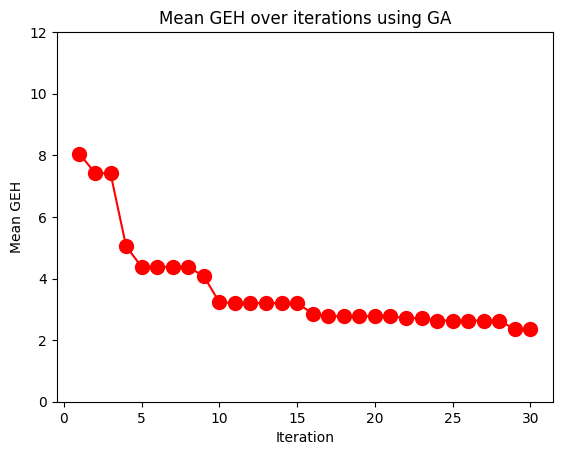

In [3]:
minGEHset
import matplotlib.pyplot as plt

plt.plot(range(1,num_generations+1), minGEHset, 'o-', color='red', markersize=10)

plt.xlabel('Iteration')
plt.ylabel('Mean GEH')
plt.title('Mean GEH over iterations using GA')
# plt.legend()
# plt.xticks(ticks=range(0,21))  
plt.xticks(range(0,31,5))
plt.ylim(0, 12)
plt.show()

In [4]:
minGEHset

[8.044832188112894,
 7.431123788510698,
 7.411073627792663,
 5.04682857038257,
 4.378770020675021,
 4.378770020675021,
 4.378770020675021,
 4.378770020675021,
 4.072844247846098,
 3.2287108566437315,
 3.2014335734052666,
 3.2014335734052666,
 3.2014335734052666,
 3.2014335734052666,
 3.2014335734052666,
 2.8600081685989083,
 2.777033648023145,
 2.777033648023145,
 2.777033648023145,
 2.777033648023145,
 2.777033648023145,
 2.7143009995374525,
 2.7143009995374525,
 2.6350025155748993,
 2.6350025155748993,
 2.6350025155748993,
 2.6350025155748993,
 2.6350025155748993,
 2.353340298463257,
 2.353340298463257]

In [5]:
best_solution_final

array([7.93477270e-01, 6.60528081e-01, 1.21006419e-01, 9.98726858e-01,
       4.23111294e-01, 3.26211309e-01, 8.50006733e-01, 3.66987373e-01,
       5.68197242e-02, 6.63145219e-01, 6.11164925e-02, 8.69437900e-01,
       9.51564800e+01, 8.85815697e+01, 5.59342168e+01, 8.65028861e+01])